In [ ]:
# źródło kodu: https://www.youtube.com/watch?v=0Lt9w-BxKFQ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#loading dataset
typologia=pd.read_csv("C:/Users/Maria/Documents/wyniki/typologia_Bajena6.csv", index_col=0, sep=';')
df = pd.DataFrame(typologia)
df.head()

,"[person=""(pri)""]","[person=""(sec)""]","[case=""(nom)""]","[case=""(gen)""]","[case=""(dat)""]","[case=""(acc)""]","[case=""(inst)""]","[case=""(loc)""]","[case=""(voc)""]","[pos=""(adj)""][degree=""(com)""]",...,"[orth=""(;)""]","[orth=""(;)""][orth=""(aby)""]","[orth=""(;)""][orth=""(albowiem)""]","[orth=""(;)""][orth=""(bowiem)""]","[orth=""(;)""][orth=""(by)""]","[orth=""(;)""][orth=""(iĹĽ)""]","[orth=""(;)""][orth=""(ktĂłry)""]","[orth=""(;)""][orth=""(ĹĽe)""]","[orth=""(;)""][orth=""(ĹĽeby)""]",typ
fakt_b,70,24,647,930,78,490,304,341,9,1,...,301,2,0,0,5,1,6,30,4,fakt
fakt_ba,35,9,770,700,52,491,211,362,4,0,...,388,0,0,0,0,0,7,45,7,fakt
fakt_baa,141,47,592,676,68,497,251,435,5,0,...,477,5,0,0,0,0,7,41,3,fakt
fakt_bab,20,0,529,904,46,538,285,461,2,0,...,308,3,0,0,0,0,0,30,0,fakt
fakt_bac,79,5,685,850,74,523,243,396,5,1,...,459,1,0,0,1,0,8,21,0,fakt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326 entries, fakt_b to urzed_jj
Data columns (total 55 columns):
[person="(pri)"]                                                1326 non-null int64
[person="(sec)"]                                                1326 non-null int64
[case="(nom)"]                                                  1326 non-null int64
[case="(gen)"]                                                  1326 non-null int64
[case="(dat)"]                                                  1326 non-null int64
[case="(acc)"]                                                  1326 non-null int64
[case="(inst)"]                                                 1326 non-null int64
[case="(loc)"]                                                  1326 non-null int64
[case="(voc)"]                                                  1326 non-null int64
[pos="(adj)"][degree="(com)"]                                   1326 non-null int64
[degree="(sup)"]                                 

In [4]:
df['typ'].unique()

array(['fakt', 'infpor', 'konwers', 'lit', 'ndksiazka', 'netinterakt',
       'net_nieint', 'nklasksiazka', 'publ', 'qmow', 'urzed'],
      dtype=object)

In [5]:
label_typ=LabelEncoder()

In [6]:
df['typ'] = label_typ.fit_transform(df['typ'])

In [7]:
df['typ'].value_counts()

8     175
10    150
9     150
6     150
3     150
1     150
2     141
0     105
4      93
5      37
7      25
Name: typ, dtype: int64

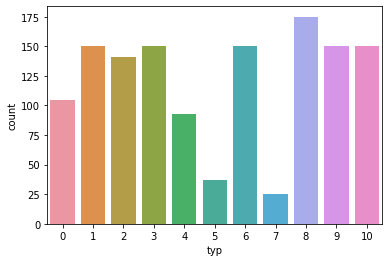

In [8]:
sns.countplot(df['typ'])

In [9]:
#Now separate the dataset as response variable and feature variables
X = df.drop('typ', axis=1)
y = df['typ']

In [10]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
#Applying Standard scaling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [1]:
X_train[:10]

NameError: name 'X_train' is not defined

# Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
#How well the model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.56      0.76      0.64        25
           1       0.88      0.90      0.89        42
           2       1.00      1.00      1.00        56
           3       0.85      0.83      0.84        47
           4       0.90      0.82      0.86        34
           5       1.00      0.12      0.22         8
           6       0.82      0.92      0.87        39
           7       0.00      0.00      0.00         8
           8       0.71      0.76      0.74        55
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        44

   micro avg       0.86      0.86      0.86       398
   macro avg       0.79      0.74      0.73       398
weighted avg       0.86      0.86      0.85       398

[[19  0  0  5  0  0  0  0  1  0  0]
 [ 0 38  0  0  0  0  1  0  3  0  0]
 [ 0  0 56  0  0  0  0  0  0  0  0]
 [ 7  0  0 39  0  0  1  0  0  0  0]
 [ 0  2  0  0 28  0  1  0  3  0  0]
 [ 0  2

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM Classifier

In [15]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [16]:
#How well the model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.46      0.68      0.55        25
           1       0.84      0.86      0.85        42
           2       1.00      0.98      0.99        56
           3       0.89      0.85      0.87        47
           4       0.76      0.76      0.76        34
           5       0.00      0.00      0.00         8
           6       0.92      0.90      0.91        39
           7       0.00      0.00      0.00         8
           8       0.69      0.82      0.75        55
           9       1.00      0.95      0.97        40
          10       1.00      0.98      0.99        44

   micro avg       0.84      0.84      0.84       398
   macro avg       0.69      0.71      0.69       398
weighted avg       0.83      0.84      0.83       398

[[17  0  0  4  0  0  0  0  4  0  0]
 [ 0 36  0  0  2  0  0  0  4  0  0]
 [ 0  0 55  0  1  0  0  0  0  0  0]
 [ 6  0  0 40  0  0  1  0  0  0  0]
 [ 2  3  0  0 26  0  0  0  3  0  0]
 [ 0  2

C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Network

In [17]:
mlpc=MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=10000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [18]:
#How well the model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.38      0.52      0.44        25
           1       0.84      0.74      0.78        42
           2       1.00      1.00      1.00        56
           3       0.93      0.79      0.85        47
           4       0.77      0.71      0.74        34
           5       0.27      0.50      0.35         8
           6       0.90      0.90      0.90        39
           7       0.67      0.25      0.36         8
           8       0.64      0.71      0.67        55
           9       1.00      0.90      0.95        40
          10       0.96      1.00      0.98        44

   micro avg       0.81      0.81      0.81       398
   macro avg       0.76      0.73      0.73       398
weighted avg       0.83      0.81      0.81       398

[[13  2  0  3  0  0  1  1  5  0  0]
 [ 0 31  0  0  1  3  0  0  7  0  0]
 [ 0  0 56  0  0  0  0  0  0  0  0]
 [ 8  0  0 37  0  0  1  0  1  0  0]
 [ 3  0  0  0 24  4  0  0  2  0  1]
 [ 0  1

# Bayes

In [19]:
from sklearn.naive_bayes import BernoulliNB
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
print(BernNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


In [20]:
y_expect = y_test
pred_NB = BernNB.predict(X_test)

# Accuracy Results Summary

In [21]:
from sklearn.metrics import accuracy_score
accuracy_rfc = accuracy_score(y_test, pred_rfc)
accuracy_clf = accuracy_score(y_test, pred_clf)
accuracy_mlpc = accuracy_score(y_test, pred_mlpc)
accuracy_NB = accuracy_score(y_test, pred_NB)

print("Accuracy Random Forest: ", accuracy_rfc)
print("Accuracy SVM: ", accuracy_clf)
print("Accuracy Neural Network: ", accuracy_mlpc)
print("Accuracy Bayes: ", accuracy_NB)



Accuracy Random Forest:  0.8618090452261307
Accuracy SVM:  0.8417085427135679
Accuracy Neural Network:  0.8065326633165829
Accuracy Bayes:  0.7361809045226131
